#  Additional Movie Analyses
This notebook explores:
- Average movie rating by language
- Average movie duration by genre
- Number of movies released per year

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load and Combine Movie Datasets

In [2]:
# Load datasets
bollywood = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_bollywood_movies.csv')
indian = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_indian_movies_simple_detailed.csv')
tollywood = pd.read_csv('/home/nineleaps/Documents/Python_Training/Final_test/movies_data/cleaned_data_csv/cleaned_tollywood_movies.csv')

In [3]:
# Standardize column names and select only needed columns
columns = ['MovieID','Title','Director','Genre','ReleaseYear','Budget (Crores)',
           'BoxOffice (Crores)','Rating','Duration (minutes)','LeadActor',
           'LeadActress','Language','ProductionCompany']

bollywood = bollywood.rename(columns={
    'movieid': 'MovieID',
    'title': 'Title',
    'director': 'Director',
    'genre': 'Genre',
    'releaseyear': 'ReleaseYear',
    'budget_crores': 'Budget (Crores)',
    'boxoffice_crores': 'BoxOffice (Crores)',
    'rating': 'Rating',
    'duration_minutes': 'Duration (minutes)',
    'leadactor': 'LeadActor',
    'leadactress': 'LeadActress',
    'language': 'Language',
    'productioncompany': 'ProductionCompany'
})[columns]

indian = indian[columns]
tollywood = tollywood[columns]

In [4]:
# Combine datasets and deduplicate by lowercase title
combined = pd.concat([bollywood, indian, tollywood], ignore_index=True)
combined['Title'] = combined['Title'].str.lower().str.strip()
combined = combined.sort_values(by='ReleaseYear', ascending=False).drop_duplicates(subset='Title', keep='first')

##  Perform Additional Analyses

In [5]:
avg_rating_language = combined.groupby('Language')['Rating'].mean().sort_values(ascending=False)
avg_duration_genre = combined.groupby('Genre')['Duration (minutes)'].mean().sort_values(ascending=False)
movies_per_year = combined['ReleaseYear'].value_counts().sort_index()

##  Visualizations

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'English (Dubbed in Telugu, Kannada, Hindi)'),
  Text(1, 0, 'Kannada (Dubbed from Tamil)'),
  Text(2, 0, 'Telugu'),
  Text(3, 0, 'Tamil'),
  Text(4, 0, 'Hindi'),
  Text(5, 0, 'Kannada'),
  Text(6, 0, 'Kannada (Dubbed from Malayalam)'),
  Text(7, 0, 'Telugu (Dubbed in Hindi, Kannada)'),
  Text(8, 0, 'Telugu (Dubbed from Hindi)')])

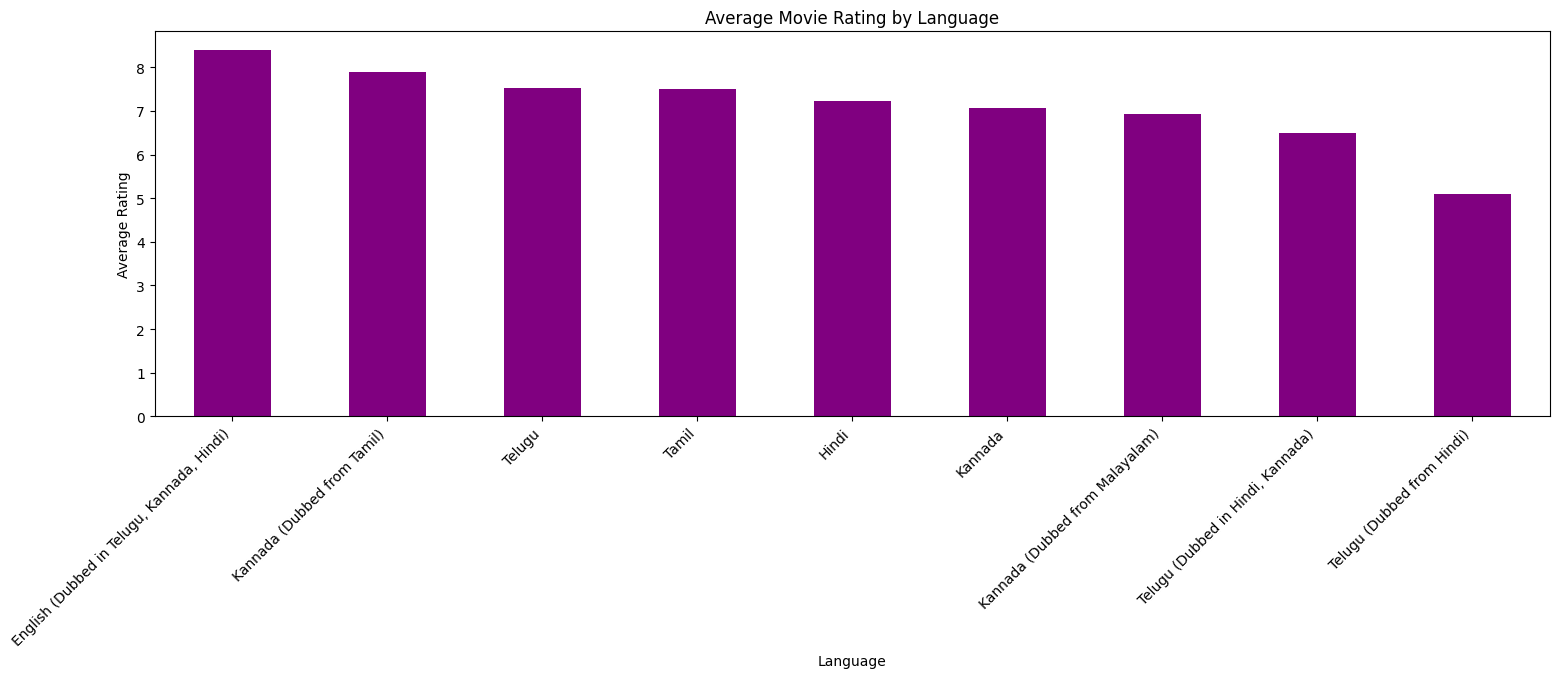

In [10]:
plt.figure(figsize=(18, 5))

# Plot 1: Avg Rating by Language
avg_rating_language.plot(kind='bar', color='purple')
plt.title('Average Movie Rating by Language')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Unknown'),
  Text(1, 0, 'Family Drama'),
  Text(2, 0, 'Romance'),
  Text(3, 0, 'Superhero'),
  Text(4, 0, 'Biographical Sports Drama'),
  Text(5, 0, 'Action-Adventure'),
  Text(6, 0, 'Sports Action'),
  Text(7, 0, 'Epic Fantasy Action'),
  Text(8, 0, 'Psychological Thriller'),
  Text(9, 0, 'Action Drama'),
  Text(10, 0, 'Sports Drama'),
  Text(11, 0, 'Historical Romance'),
  Text(12, 0, 'Action Thriller'),
  Text(13, 0, 'Romantic Drama'),
  Text(14, 0, 'Satirical Comedy'),
  Text(15, 0, 'Satirical Science Fiction Comedy'),
  Text(16, 0, 'Musical Drama'),
  Text(17, 0, 'Superhero Science Fiction'),
  Text(18, 0, 'Historical Action'),
  Text(19, 0, 'Romantic Comedy'),
  Text(20, 0, 'Drama'),
  Text(21, 0, 'Action Comedy'),
  Text(22, 0, 'Science Fiction Action'),
  Text(23, 0, 'Biographical Drama'),
  Text(24, 0, 'Comedy Drama'),
  Text(25, 0, 'Thriller'

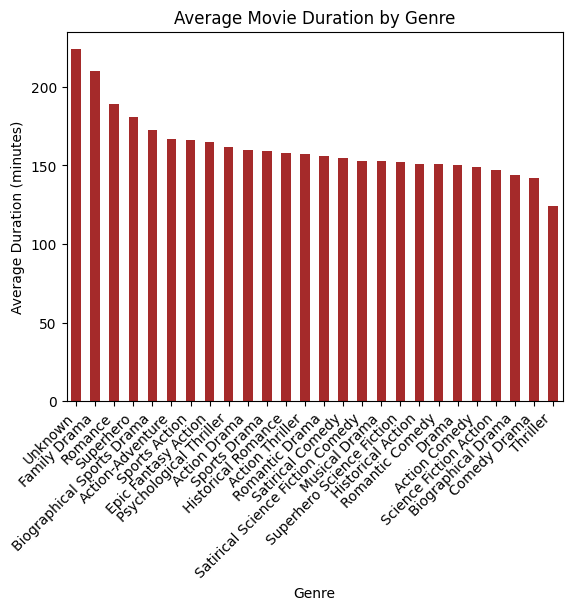

In [9]:

# Plot 2: Avg Duration by Genre
avg_duration_genre.plot(kind='bar', color='brown')
plt.title('Average Movie Duration by Genre')
plt.ylabel('Average Duration (minutes)')
plt.xticks(rotation=45, ha='right')


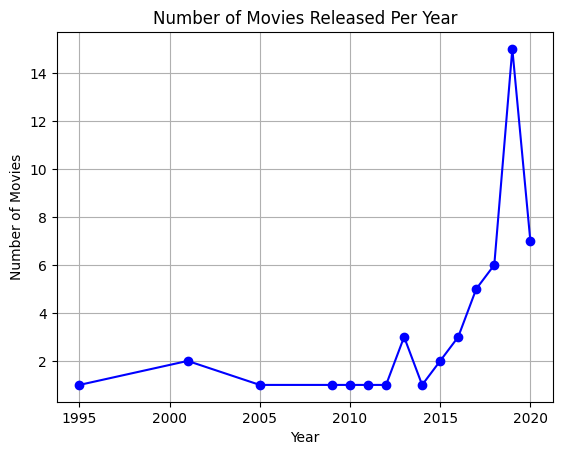

In [12]:

# Plot 3: Movies Released Per Year
movies_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Number of Movies Released Per Year')
plt.ylabel('Number of Movies')
plt.xlabel('Year')
plt.grid(True)

plt.show()